In [2]:
# import frameworks
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the dataset
df = pd.read_csv('diabetes_risk_prediction_dataset.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [15]:
X = df.drop(['class'], axis=1)

y = df['class']

In [16]:
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier

In [18]:
num_col = df.select_dtypes(include=["float", "int"]).columns
num_col

Index(['Age'], dtype='object')

In [40]:
cat_col = df.select_dtypes(include=["object"]).drop(['class'], axis=1).columns
cat_col

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [41]:
ohe = OneHotEncoder()
scaler = RobustScaler()
model = RandomForestClassifier()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_col),
        ('cat', ohe, cat_col)
    ]
)


preprocessor

ColumnTransformer(transformers=[('num', RobustScaler(),
                                 Index(['Age'], dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object'))])

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)
                           ])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  Index(['Age'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
434,53,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No
436,41,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes
208,54,Male,No,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No
332,50,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No
220,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,35,Female,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,Yes,No,No
106,58,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes,Yes
270,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Yes,No,No
435,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No


In [46]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  Index(['Age'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [48]:
ohe_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_col)

num_feature = num_col

ohe_names

array(['Gender_Female', 'Gender_Male', 'Polyuria_No', 'Polyuria_Yes',
       'Polydipsia_No', 'Polydipsia_Yes', 'sudden weight loss_No',
       'sudden weight loss_Yes', 'weakness_No', 'weakness_Yes',
       'Polyphagia_No', 'Polyphagia_Yes', 'Genital thrush_No',
       'Genital thrush_Yes', 'visual blurring_No', 'visual blurring_Yes',
       'Itching_No', 'Itching_Yes', 'Irritability_No', 'Irritability_Yes',
       'delayed healing_No', 'delayed healing_Yes', 'partial paresis_No',
       'partial paresis_Yes', 'muscle stiffness_No',
       'muscle stiffness_Yes', 'Alopecia_No', 'Alopecia_Yes',
       'Obesity_No', 'Obesity_Yes'], dtype=object)

In [50]:
all_name = list(num_feature) + list(ohe_names)
all_name[:5]

['Age', 'Gender_Female', 'Gender_Male', 'Polyuria_No', 'Polyuria_Yes']

In [51]:
importance = pipeline.named_steps['classifier'].feature_importances_

importance

array([0.06422793, 0.03911133, 0.05802179, 0.13513524, 0.12755556,
       0.09195605, 0.08139102, 0.02831754, 0.04750371, 0.00949281,
       0.00818895, 0.01357409, 0.0090184 , 0.01158495, 0.00937005,
       0.01457872, 0.01400845, 0.01743671, 0.01356365, 0.01798395,
       0.02223581, 0.02011933, 0.01536324, 0.01666127, 0.02340311,
       0.01589756, 0.01398366, 0.0201995 , 0.0230547 , 0.00757319,
       0.00948774])

In [54]:
# map importance to their feature names now

feature_importance = dict(zip(all_name, importance))


In [56]:
# sort the feature importance

sorted_importances = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

sorted_importances[:5]

[('Polyuria_No', 0.13513524202241),
 ('Polyuria_Yes', 0.12755555571619),
 ('Polydipsia_No', 0.09195605213045785),
 ('Polydipsia_Yes', 0.081391021363639),
 ('Age', 0.06422792961345283)]

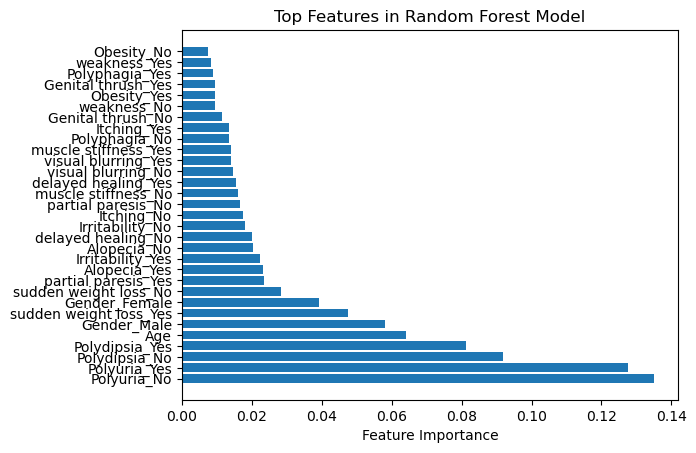

In [57]:
import matplotlib.pyplot as plt

top_features = [feature[0] for feature in sorted_importances]
top_importance = [feature[1] for feature in sorted_importances]

plt.barh(top_features, top_importance)
plt.xlabel('Feature Importance')
plt.title('Top Features in Random Forest Model')
plt.savefig('rf_features.png')
plt.show()